In [1]:
import warnings
from sklearn.utils import ConvergenceWarning
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", ConvergenceWarning)

# Build You a Machine Learning

G iven some inputs $x_1, \ldots, x_n \in \mathbb{R}^m $, and corresponding outputs $y_1, \ldots, y_n \in \mathbb{R}$, find a function $f: \mathbb{R}^n \to \mathbb{R}$ so that

\begin{equation}
f(x) \approx y
\end{equation}
for all $(x, y)$ drawn from the same distribution as $(x_j, y_j)$.


## Definitions!

The points $x_j$ are *features* and corresponding $y_j$ are *labels*.  Together, they are called the *training set*, and since we love matrices and notation gets hellish without them,

\begin{equation}
X = (x_1, \ldots, x_n) = \left( \begin{array}{ccc} 
x_1^1 & \ldots & x_1^m \\
\vdots & & \vdots \\
x_n^1 & \ldots & x_n^m
\end{array} \right)
\end{equation}

Also, 
$$ \mathbf{y} = (y_1, \ldots, y_n) $$

## Some practical notes:

* You don't have to use the features you are given.  The literature will sometimes call the $X$ you use for model building *basis functions*.  Another word to google about this is *feature selection*.
* There is a lot to be said about *overfitting*.
* You probably want to reserve some data to use as a *test set*, and maybe some more for *cross validation*.

## More notes

* *Regression* tasks mean the labels are real valued.  *Classification* tasks have categorical labels.
* A task is *supervised* if you have labels, *unsupervised* if you don't, and *semi-supervised* if you have some, but not tons.

## Linear Regression
$$ f(\mathbf{x}) \approx y \Rightarrow \mathbf{x} \cdot \mathbf{w} \approx y $$

For **reasons** we will choose the vector $\mathbf{w}$ that minimizes
$$
cost(\mathbf{w}) = \| X\mathbf{w} - \mathbf{y} \|^2
$$

## Deriving an exact least squares solution:

\begin{eqnarray}
&& X\mathbf{w} = \mathbf{y} \\
&\Rightarrow& X^T X \mathbf{w} = X^T \mathbf{y} \\
&\Rightarrow& \mathbf{w} = (X^TX)^{-1} X^T \mathbf{y}
\end{eqnarray}

The best part is that this is almost true!


<img src=knowledge.gif>

## Examples!

Let's generate some random data for *supervised regression*:

In [2]:
import numpy as np
DIM = 5
COEFS = np.random.randn(DIM)

def generate_feature(x, weights):
    feature = [w * x ** idx for idx, w in enumerate(weights)]
    return feature

def generate_features_and_labels(X, weights, noise=0):
    features = np.array([generate_feature(x, weights) for x in X])
    features += noise * np.random.randn(*features.shape)
    labels = features.sum(axis=1)
    return features, labels

print(COEFS)

[-1.09805639  0.42003036 -2.48283096  0.44664483  0.06329607]


## Model Building

[Scikit-learn](http://scikit-learn.org/) makes our lives easy:

In [3]:
from sklearn.linear_model import LinearRegression
x = np.random.random(50)
features, y = generate_features_and_labels(x, COEFS, noise=0.05)

reg = LinearRegression().fit(x.reshape(-1, 1), y)
print("y = {:.2f} * x + {:.2f}".format(reg.coef_[0], reg.intercept_))

y = -1.80 * x + -0.71


In [4]:
from talk_utils import Matrix

# Manually add intercept
A = Matrix([list(x), [1 for _ in x]]).T
b = Matrix([list(y)]).T

w = (A.T * A).inverse() * A.T * b
print("y = {:.2f} * x + {:.2f}".format(w.vals[0][0], w.vals[1][0]))

y = -1.80 * x + -0.71


## Plotting with pyplot

We use the model to make a prediction and then plot that prediction:

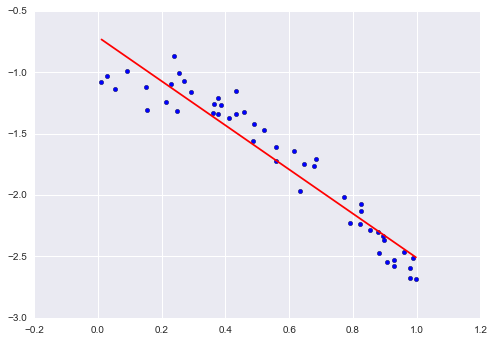

In [5]:
%matplotlib inline
import seaborn # makes plots pretty
from talk_utils import plotter

t = np.linspace(x.min(), x.max())
plotter(t, reg.predict(t.reshape(-1, 1)), x, y)

## Linear regression can also be curvy!


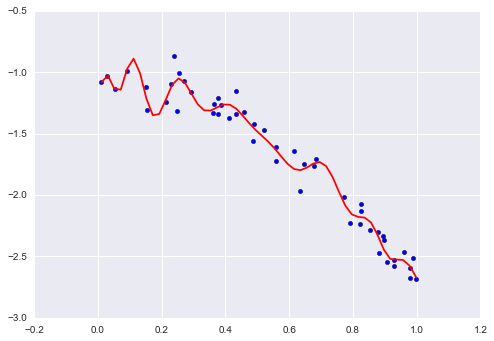

In [6]:
new_dim = 4 * DIM
high_dim_features, _ = generate_features_and_labels(x, np.ones(new_dim))

overfit_reg = LinearRegression().fit(high_dim_features, y)

t_transformed, _ = generate_features_and_labels(t, np.ones(new_dim))
overfit_preds = overfit_reg.predict(t_transformed)
plotter(t, overfit_preds, x, y)

## Other forms of regression!

### Ridge regression: 
Instead of minimizing 
$$
cost(\mathbf{w}) = \| X\mathbf{w} - \mathbf{y} \|^2
$$
we will minimize 
$$
cost(\mathbf{w}) = \| X\mathbf{w} - \mathbf{y} \|^2 + \alpha \|\mathbf{w} \|^2
$$

* Intuitively: we want to penalize complexity, so having a big weight incurs a penalty
* Notice we now also have to choose $\alpha$
* This is also called $L^2$ *regularization*

array([ 0.        , -0.41349154, -0.58080439, -0.44419022, -0.27891466,
       -0.15459739, -0.07354935, -0.02405877,  0.00500718,  0.02155159,
        0.03063587,  0.03534176,  0.03748795,  0.03812214,  0.03783417,
        0.03694787,  0.0356356 ,  0.03398576,  0.03204177,  0.02982429])

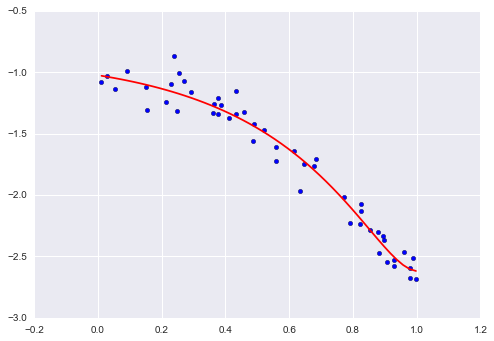

In [7]:
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV().fit(high_dim_features, y)

ridge_preds = ridge_reg.predict(t_transformed)

plotter(t, ridge_preds, x, y)
ridge_reg.coef_

### Lasso regression: 
Instead of minimizing 

We will minimize 
$$
cost(\mathbf{w}) = \| X\mathbf{w} - \mathbf{y} \|^2 + \alpha \|\mathbf{w} \|^1
$$

* This encourages sparse weights for awesome, easy reasons
* We still have to choose $\alpha$
* This is also called $L^1$ *regularization*

0.965889563709
0.966076370214
0.978404025746


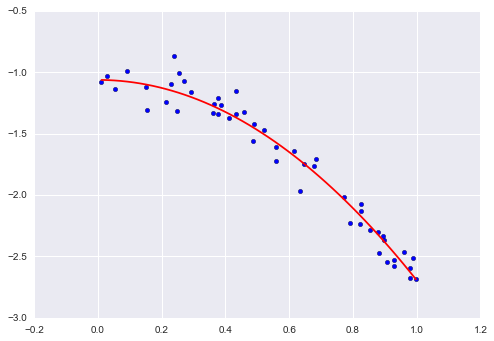

In [8]:
from sklearn.linear_model import LassoCV

lasso_reg = LassoCV()
lasso_reg.fit(high_dim_features, y)

lasso_preds = lasso_reg.predict(t_transformed)

plotter(t, lasso_preds, x, y)
print(lasso_reg.score(high_dim_features, y))
print(ridge_reg.score(high_dim_features, y))
print(overfit_reg.score(high_dim_features, y))

## Classification!



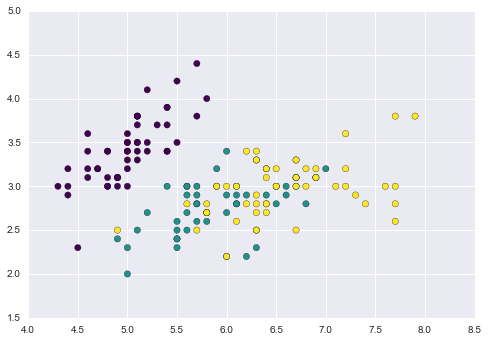

In [9]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

CMAP = plt.cm.viridis
iris = load_iris()
X = iris.data[:, :2]
_, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=iris.target, cmap=CMAP, s=40);

In [10]:
from sklearn.metrics import accuracy_score

def visualize_classifier(classifier_cls):
    clf = classifier_cls().fit(X, iris.target)
    x_min, y_min = X.min(axis=0) - 1
    x_max, y_max = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=iris.target, cmap=CMAP, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    print("Accuracy is {:.1%}".format(accuracy_score(clf.predict(X), iris.target)))

Accuracy is 76.7%


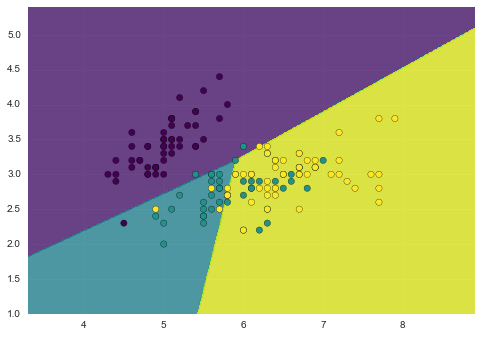

In [11]:
from sklearn.linear_model import LogisticRegression

visualize_classifier(LogisticRegression)

Accuracy is 83.3%


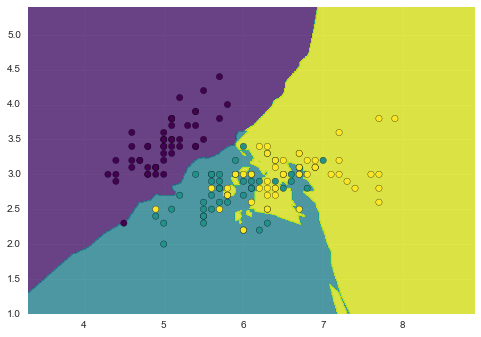

In [12]:
from sklearn.neighbors import KNeighborsClassifier

visualize_classifier(KNeighborsClassifier)

Accuracy is 82.7%


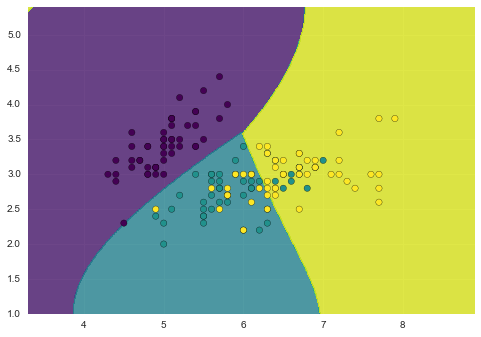

In [13]:
from sklearn.svm import SVC

visualize_classifier(SVC)

Accuracy is 78.0%


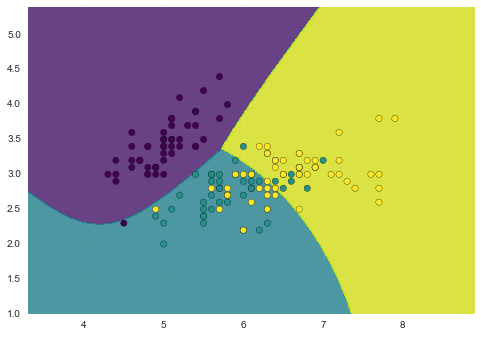

In [14]:
from sklearn.naive_bayes import GaussianNB

visualize_classifier(GaussianNB)

Accuracy is 92.7%


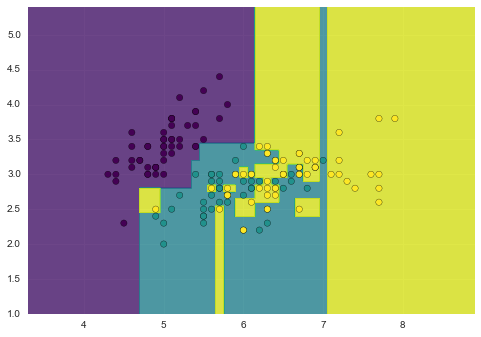

In [15]:
from sklearn.tree import DecisionTreeClassifier

visualize_classifier(DecisionTreeClassifier)

Accuracy is 92.0%


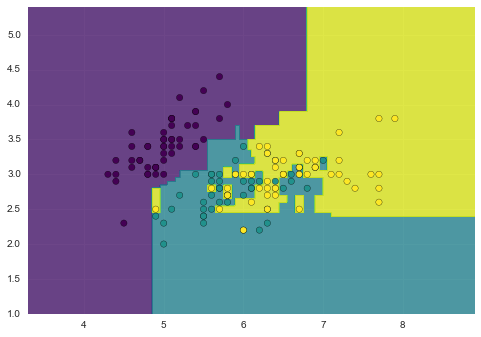

In [16]:
from sklearn.ensemble import RandomForestClassifier

visualize_classifier(RandomForestClassifier)